## <font color='darkblue'>Preface</font>
([course link](https://analyticsindiamag.com/how-to-create-a-custom-data-transformer-using-sklearn/)) <font size='3ptx'><b>The sklearn package provides a mechanism to standardize data transformations.</b></font>

<b>The sklearn is a Python-based machine learning package that provides a collection of various data transformations for modifying the data as per need</b>. Many simple data cleaning processes, such as deleting columns etc, are often done manually on the data, so we need to use custom code. The sklearn package provides a mechanism to standardise these unique data transformations so that they can be used like any other transformation, either directly on the data or as part of the modelling pipeline. In this article, you will learn how to create and apply custom data transformations for sklearn.

Following are the articles to be covered.

<a id='sect0'></a>
### <font color='darkgreen'>Table of contents</font>
1. <font size='3ptx'><b><a href='#sect1'>How is a custom data transformer built using sklearn?</a></b></font>
2. <font size='3ptx'><b><a href='#sect2'>Creating Custom transformer</a></b></font>

<a id='sect1'></a>
## <font color='darkblue'>How is a custom data transformer built using sklearn?</font>
<font size='3ptx'><b>The [sklearn](https://scikit-learn.org/) which is a Python-based machine learning package directly provides many various data preparation strategies, such as scaling numerical input variables and modifying variable probability distributions. </b></font>

The process of modifying raw data to make it fit for machine learning algorithms is known as data preparation.

<b>When assessing model performance using data sampling approaches such as k-fold cross-validation, these transformations will allow fitting and applying the transformations to a dataset without leaking data.</b>

While the [**data preparation**](https://analyticsindiamag.com/exploring-dataprep-a-python-library-for-data-preparation-eda/) techniques provided by sklearn are comprehensive, it may be necessary to perform additional data preparation processes. These additional processes are often conducted manually before modelling and need the creation of bespoke code. <b><font color='darkred'>The danger is that these data preparation stages will be carried out inconsistently.</font></b>

<b>The approach is to use the [FunctionTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html) class to construct a custom data transform in sklearn</b>. This class lets the user define a function that will be invoked to change the data. Defining the function and making any valid alteration, such as modifying the values or eliminating data columns (<font color='brown'>not removing rows</font>). <b>The class may then be used in sklearn just like any other data transform, for example, to directly convert data or in a modelling pipeline</b>.

Before moving on to creating a Custom Transformer, here are a couple of things worth being familiar with:
* Using scikit-learn Transformers in Pipelines or using the fit transform() technique.
* Class creation, inheritance, and the super() method in Python.

<a id='sect2'></a>
## <font color='darkblue'>Creating Custom transformer</font>
We simply need to fulfil a few fundamental parameters to develop a Custom Transformer:
1. Initialize a transformer class.
2. The [**BaseEstimator**](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html#sklearn.base.BaseEstimator) and [**TransformerMixin**](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html#sklearn.base.TransformerMixin) classes from the [sklearn.base](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.base) modules are inherited by this class.
3. The instance methods <font color='blue'>fit()</font> and <font color='blue'>transform()</font> are implemented by the class. To be compatible with Pipelines, these methods must have both `X` and `Y` arguments, and transform() must return a pandas DataFrame or NumPy array.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
class Basictransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X["cust_num"] = randint(0, 10, X.shape[0])
        return X

In [3]:
df_basic = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6], "c": [7, 8, 9]})
pipe = Pipeline(
    steps=[
        ("use_custom_transformer", Basictransformer())
    ]
)
transformed_df = pipe.fit_transform(df_basic)
df_basic

,a,b,c,cust_num
0,1,4,7,9
1,2,5,8,3
2,3,6,9,2


A custom class is built, in which fit and transform functions are defined. Both of these functions are necessary for the pipeline to function smoothly. The pipeline will perform all the operations which are mentioned in the class.

Let’s build a custom transformer and apply it to the data frame and predict some values. Here uses a [data set](https://www.kaggle.com/datasets/awaiskaggler/insurance-csv?resource=download&select=insurance.csv) related to the insurance sector in which the cost of insurance will be predicted based on different features and observations.

In [4]:
df=pd.read_csv("../../datas/kaggle_insurance_csv/insurance.csv")
df_util=pd.get_dummies(data=df,columns=['sex','smoker','region'],drop_first=True)

In [5]:
df_util.sample(n=5)

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
454,32,46.5,2,4686.39,1,0,0,1,0
81,45,38.3,0,7935.29,0,0,0,0,0
827,36,28.0,1,20773.63,1,1,0,0,0
498,44,24.0,2,8211.10,0,0,0,1,0
575,58,27.2,0,12222.90,0,0,1,0,0


The plot below is representing the distribution of insurance charges with respect to the body mass index (BMI) of customers and categorised by their age.

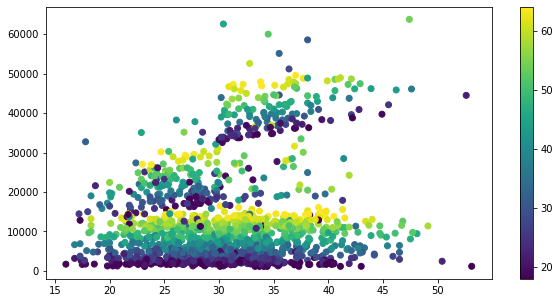

In [6]:
plt.rcParams['figure.figsize'] = [10, 5]
sc = plt.scatter(df_util['bmi'], df_util['expenses'], c=df_util['age'])
plt.colorbar(sc)
plt.show()

Next, let's split the data for train and validation as per the standard ratio of 70:30.

In [7]:
X=df_util.drop(['expenses'], axis=1)
y=df_util['expenses']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Create a custom transformer and use the transformer for transforming the train data for learners.

In [8]:
class CustomTransformer(BaseEstimator, TransformerMixin):
  
  def __init__(self, feature_name, additional_param = "SM"):  
    print('\n...intializing\n')
    self.feature_name = feature_name
    self.additional_param = additional_param
 
  def fit(self, X, y = None):
    print('\nfiting data...\n')
    print(f'\n \U0001f600  {self.additional_param}\n')
    return self
 
  def transform(self, X, y = None):
    print('\n...transforming data \n')
    X_ = X.copy()
    X_[self.feature_name] = np.log(X_[self.feature_name])
    return X

print("creating second pipeline...")
pipe2 = Pipeline(steps=[
    ('experimental_trans', CustomTransformer('bmi')),
    ('linear_model', LinearRegression())
])

creating second pipeline...

...intializing



In [9]:
print("fiting pipeline 2")
pipe2.fit(X_train, y_train)
preds2 = pipe2.predict(X_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, preds2))}\n")

fiting pipeline 2

fiting data...


 😀  SM


...transforming data 


...transforming data 

RMSE: 5811.806354382951



The pipeline is employed since it would be difficult to apply all of these stages sequentially with individual code blocks. <b>Because pipelines keep sequencing in a single block of code, the pipeline itself becomes an estimator, capable of completing all operations in a single statement.</b> 

There are some additional things added in the class if compared to the above basic transformer. In this transformer, the user can mention the names of the features on which the operations needed to be performed. This process is known as passing arguments.

The linear regression model is built using the custom transformer. <b>The transformer is converting the values to logs for the learner to decrease the bias toward larger values. This kind of bias is common in linear regression models</b>.

Text(0, 0.5, 'Prediction')

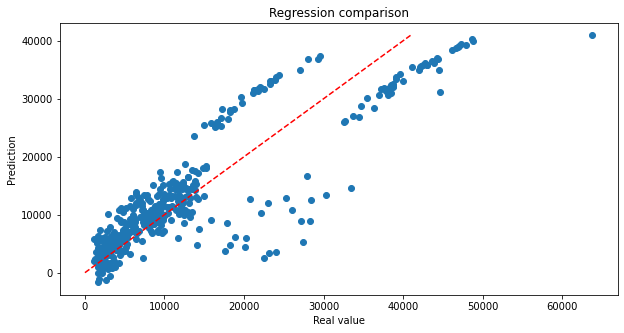

In [19]:
plt.rcParams['figure.figsize'] = [10, 5]
xy_line = [v for v in range(0, int(min(max(y_test), max(preds2))))]

plt.scatter(y_test, preds2)
plt.plot(xy_line, 'r--', label='Expected')

plt.title("Regression comparison")
plt.xlabel("Real value")
plt.ylabel("Prediction")

The above representation is a regression plot between the observed insurance expenses and the predicted insurance expenses. It could be observed that the regression line is explaining the relationship adequately. 

So, till now we are able to build the custom transformer and utilise it to predict the values. But what if we want to customise the existing transformer offered by sklearn. <b>Let’s customise the ordinal encoder and implement it on the data used above.</b>

In [22]:
class CustEncoder(OrdinalEncoder):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
    def transform(self, X, y=None):
        transformed_data = super().transform(X)
        encoded_data = pd.DataFrame(transformed_data, columns=self.feature_names_in_)
        return encoded_data
    
data = df[['sex','smoker','region']]
enc = CustEncoder(dtype=int)
new_data = enc.fit_transform(data)
new_data[:8]

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1
5,0,0,2
6,0,0,2
7,0,0,1


By using the <font color='blue'>super()</font> method any predefined transformer could be customised according to the need.

## <font color='darkblue'>Conclusion</font>
<font size='3ptx'><b>Custom Transformers provide a high degree of freedom and control for data preprocessing</b></font>. We found them particularly useful in this article for <b>encapsulating a phase in the Data Processing process, making the code much more understandable</b>. More of these custom transformers might be constructed based on the requirements using the scikit learn library; give it a shot; it will be worthwhile.